In [12]:
import numpy as np
# plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

params = {
   'axes.labelsize': 12,
   'text.fontsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   }
mpl.rcParams.update(params)
sns.set_style("whitegrid")
sns.despine()

def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def gen_lorenz_series(x0, y0, z0, num_steps, num_freq):
    dt = 0.01
    stepCnt = num_steps

    # Need one more for the initial values
    xs = np.empty((stepCnt,))
    ys = np.empty((stepCnt,))
    zs = np.empty((stepCnt,))

    # Setting initial values
    #xs[0], ys[0], zs[0] = (0., 1., 1.05)
    xs[0] = x0
    ys[0] = y0
    zs[0] = z0

    xss = np.empty((stepCnt//num_freq,))
    yss = np.empty((stepCnt//num_freq,))
    zss = np.empty((stepCnt//num_freq,))
    # Stepping through "time".
    j = 0
    for i in range(stepCnt-1):
        # Derivatives of the X, Y, Z state
        if i%num_freq ==0:
            xss[j] = xs[i]
            yss[j] = ys[i]
            zss[j] = zs[i]
            j += 1
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    #save the sequence for training
    lorenz_series = np.transpose(np.vstack((xss,yss,zss)))
    return lorenz_series
def plot_sample(mat, sample_id):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(mat[sample_id, :,0], mat[sample_id,:,1], mat[sample_id, :,2], 'b')
    ax.scatter(mat[sample_id,:,0], mat[sample_id, :,1], mat[sample_id, :,2], c='r', s=30)


/home/roseyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### simulate data with equal interval 
this is account for the sample bias near the center

In [116]:
from numpy import linalg as LA
init = np.random.uniform(-0.1,0.1,(1,3))

x0 = init[0,0]
y0 = init[0,1]
z0 = init[0,2]

def gen_lorenz_series2(x0, y0, z0, num_steps):
    dt = 0.01
    eps = 10
    stepCnt = int(1e4)

    # Need one more for the initial values
    xs = np.empty((stepCnt,))
    ys = np.empty((stepCnt,))
    zs = np.empty((stepCnt,))

    # Save the velocity
    xds = np.empty((stepCnt,))
    yds= np.empty((stepCnt,))
    zds = np.empty((stepCnt,))
    # Setting initial values
    #xs[0], ys[0], zs[0] = (0., 1., 1.05)
    xs[0] = x0
    ys[0] = y0
    zs[0] = z0


    xss = []
    yss = []
    zss = []
    # Stepping through "time".
    j = 0
    dist = 0
    for i in range(stepCnt-1):
        # Derivatives of the X, Y, Z state
        if dist > eps: # traverse distance from the last point
            xss.append(xs[i])
            yss.append(ys[i])
            zss.append(zs[i])
            dist = 0
            j += 1
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xds[i] = x_dot
        yds[i] = y_dot
        zds[i] = z_dot
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

        #Compute the travel distance
        vec = np.array([xs[i+1], ys[i+1], zs[i+1]])-np.array([xs[i], ys[i], zs[i]])
        dist = dist + LA.norm( np.linalg.norm(vec))
        if j >=num_steps:
            break

    xss = np.array(xss)
    yss = np.array(yss)
    zss = np.array(zss)
    #save the sequence for training
    lorenz_series = np.transpose(np.vstack((xss,yss,zss)))
    return lorenz_series

#define initial range
num_samples = int(1e4)
num_steps = int(1e2)

init_range = np.random.uniform(-0.1,0.1,(num_samples,3))
lorenz_series_mat = np.ndarray((num_samples, num_steps, 3))
for i in range(num_samples):
    x0,y0,z0 = init_range[i,:]
    series = gen_lorenz_series2(x0,y0,z0, num_steps )
    if i%1000==0:
        print(i)
    lorenz_series_mat[i,:,:] = series

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


### simulate data with inital range

In [ ]:
#define initial range
num_samples = int(1e4)
num_freq = int(5)
num_steps = int(1e2)*num_freq

init_range = np.random.uniform(-0.1,0.1,(num_samples,3))
lorenz_series_mat = np.ndarray((num_samples, num_steps//num_freq, 3))
for i in range(num_samples):
    x0,y0,z0 = init_range[i,:]
    series = gen_lorenz_series2(x0,y0,z0, num_steps, num_freq )
    lorenz_series_mat[i,:,:] = series

### simulate train and test in different initial range

In [ ]:
num_freq = int(5)
num_steps = int(1e2)*num_freq

#train
train_samples = int(9000)
train_range = np.random.uniform(-0.1,0.1,(train_samples,3))
train_mat = np.ndarray((train_samples, num_steps//num_freq, 3))
for i in range(train_samples):
    x0,y0,z0 = train_range[i,:]
    series = gen_lorenz_series(x0,y0,z0, num_steps, num_freq )
    train_mat[i,:,:] = series
    
    
# test
test_samples = int(1000)
test_range = np.random.uniform(-0.1+1,0.1+1,(test_samples,3))
test_mat = np.ndarray((test_samples, num_steps//num_freq, 3))
for i in range(test_samples):
    x0,y0,z0 = test_range[i,:]
    series = gen_lorenz_series(x0,y0,z0, num_steps, num_freq )
    test_mat[i,:,:] = series
    
# combine
lorenz_mat = np.concatenate((train_mat, test_mat), axis=0 )
print('data shape', lorenz_mat.shape)


### visualization of the simulated data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


T = len(xs)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs[:T], ys[:T], zs[:T], 'b')
ax.scatter(xss[:T], yss[:T], zss[:T], c='r', s=30)

### save the simulation data

In [112]:
print(lorenz_series_mat.shape)
print(series)

(10000, 100, 3)
None


### load the simulation data

data shape (10000, 50, 3)


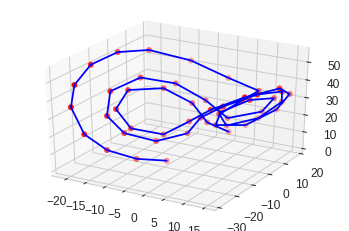

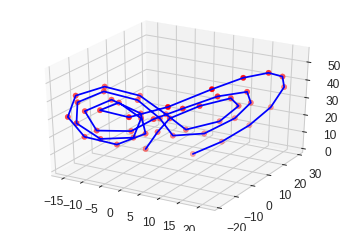

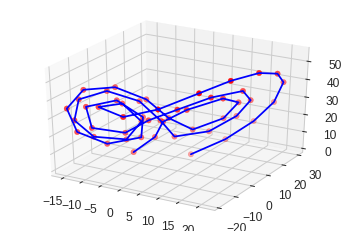

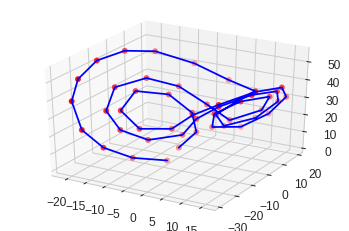

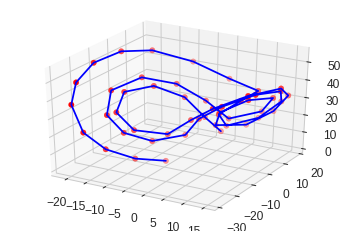

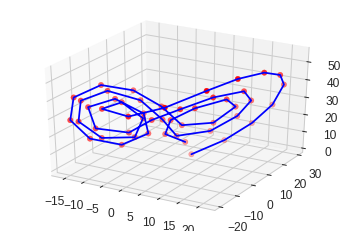

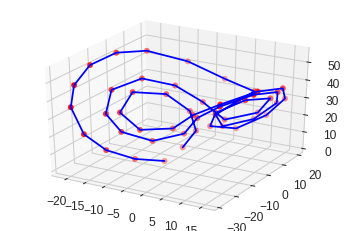

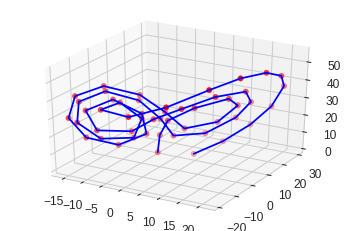

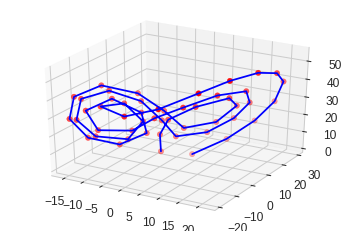

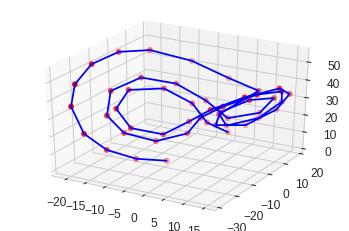

In [15]:
import numpy as np
data_path="../lorenz_even_50.npy"
lorenz_mat = np.load(data_path)
print('data shape', lorenz_mat.shape)

sample_id = 0
for i in range(0,5):
    plot_sample(lorenz_mat, i)
for i in range(9005,9010):
    plot_sample(lorenz_mat, i)

### append time stamps to the data

In [ ]:
ts_stamps = np.tile(np.arange(0,100), (10000,1))
ts_stamps = np.expand_dims(ts_stamps, axis = 2)
print(ts_stamps.shape)
lorenz  = np.concatenate((lorenz_series_mat, ts_stamps), axis=2) 
print(lorenz.shape)

### predict the first-order difference

In [ ]:
import numpy as np

def first_diff(dat):
    # dat is time x dim
    res = np.zeros(dat.shape)
    res[0,:]= dat[0,:]
    res[1:,:] = dat[1:] - dat[:-1,:]
    return res
def first_add(dat):
    res = np.zeros(dat.shape)
    res[0,:]= dat[0,:]
    for i in range(1,dat.shape[0]):
        res[i,:] = dat[i,:]+ res[i-1,:]
    return res

data_path="../lorenz.npy"
lorenz_mat = np.load(data_path)
print(lorenz_mat.shape)

lorenz_diff = np.zeros(lorenz_mat.shape)
for i in range(lorenz_mat.shape[0]):
    lorenz_diff[i,:,:]=first_diff(lorenz_mat[i,:,:])

lorenz = np.zeros(lorenz_diff.shape)
for i in range(lorenz_diff.shape[0]):
    lorenz[i,:,:]=first_add(lorenz_diff[i,:,:])


In [14]:
np.save('../lorenz_even_50.npy',lorenz_mat[:,:50,:])